In [2]:
pip install pyballmapper

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pyballmapper import BallMapper
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm
from scipy.stats import circmean

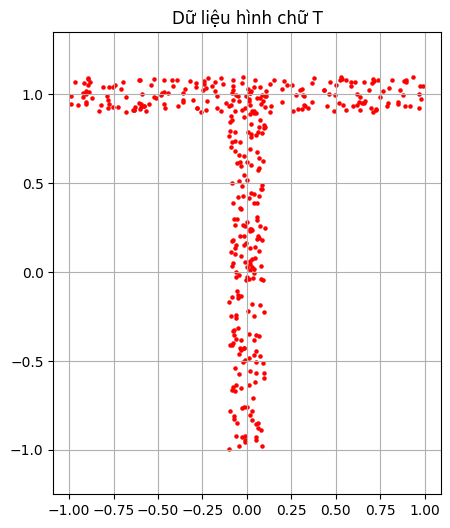

[0, 1, 2, 3, 4, 5, 6, 7]
[1, 4, 5, 6, 8, 12, 15, 16, 17, 19, 20, 21, 24, 32, 33, 37, 38, 43, 44, 45, 47, 50, 51, 52, 57, 60, 61, 62, 63, 67, 68, 69, 71, 72, 73, 74, 75, 77, 78, 79, 81, 82, 83, 86, 88, 89, 94, 96, 98, 100, 102, 103, 105, 106, 109, 111, 113, 114, 115, 117, 118, 120, 123, 128, 131, 132, 134, 136, 137, 138, 139, 143, 144, 146, 148, 149, 153, 154, 159, 161, 164, 166, 167, 169, 172, 175, 179, 180, 184, 185, 188, 189, 190, 192, 198, 272, 288, 346, 384]


C:\Users\DELL\AppData\Local\Temp\ipykernel_18228\831970847.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette=cm.get_cmap("hsv"),


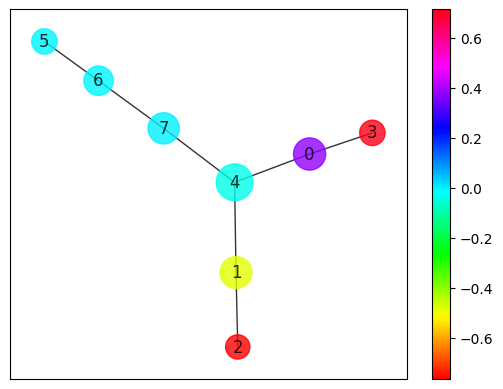

In [108]:
def generate_T_shape(n_horizontal, n_vertical, noise):
    x_h = np.random.uniform(-1, 1, n_horizontal)
    y_h = np.random.uniform(0.9, 1.1, n_horizontal)

    x_v = np.random.uniform(-0.1, 0.1, n_vertical)
    y_v = np.random.uniform(-1, 1, n_vertical)

    x = np.concatenate([x_h, x_v])
    y = np.concatenate([y_h, y_v])

    x += np.random.normal(0, noise, len(x))
    y += np.random.normal(0, noise, len(y))

    return x, y


x, y = generate_T_shape(n_horizontal=200, n_vertical=200, noise=0.0)
plt.figure(figsize=(5, 6))
plt.scatter(x, y, s=5, c='red')
plt.title("Dữ liệu hình chữ T")
plt.axis('equal')
plt.grid(True)
plt.show()

pointcloud = np.array([x, y]).T
points_df= pd.DataFrame(pointcloud, columns=['x', 'y'])
angle_df = pd.DataFrame(np.zeros((len(pointcloud), 1)), columns=['angle'])
points_df.head()

bm = BallMapper(
    X=points_df.values, eps=0.45
)
print(bm.Graph.nodes)
print(bm.points_covered_by_landmarks[1])
bm.points_and_balls()


x_df = pd.DataFrame({"x": points_df['x']})

# Gán biến màu vào BallMapper
bm.add_coloring(coloring_df=x_df, custom_function=np.mean)

# Vẽ đồ thị với màu theo trục x
from matplotlib import cm
bm.draw_networkx(
    coloring_variable="x",
    color_palette=cm.get_cmap("hsv"),
    colorbar=True
)
plt.show()

In [12]:
pip install kmapper

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import numpy as np
import sklearn
import kmapper as km
import plotly.graph_objs as go
import ipywidgets as ipw
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.cm as cm
import networkx as nx

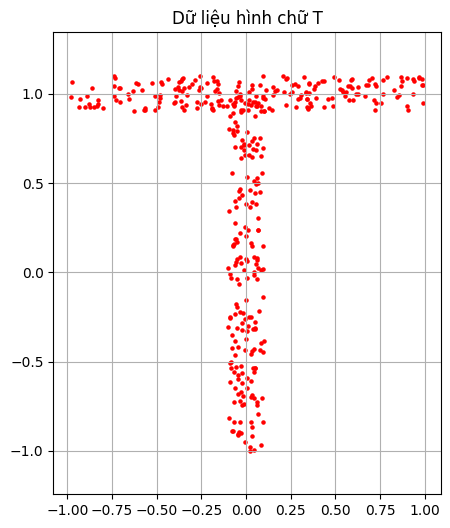

,x,y
0,-0.349150,1.034571
1,-0.374616,1.064110
2,0.107065,0.969048
3,-0.390537,0.987440
4,0.671206,1.049703


In [85]:
def generate_T_shape(n_horizontal, n_vertical, noise):
    x_h = np.random.uniform(-1, 1, n_horizontal)
    y_h = np.random.uniform(0.9, 1.1, n_horizontal)

    x_v = np.random.uniform(-0.1, 0.1, n_vertical)
    y_v = np.random.uniform(-1, 1, n_vertical)

    x = np.concatenate([x_h, x_v])
    y = np.concatenate([y_h, y_v])

    x += np.random.normal(0, noise, len(x))
    y += np.random.normal(0, noise, len(y))

    return x, y


x, y = generate_T_shape(n_horizontal=200, n_vertical=200, noise=0.0)
plt.figure(figsize=(5, 6))
plt.scatter(x, y, s=5, c='red')
plt.title("Dữ liệu hình chữ T")
plt.axis('equal')
plt.grid(True)
plt.show()

X = np.array([x, y]).T
points_df= pd.DataFrame(X, columns=['x', 'y'])
angle_df = pd.DataFrame(np.zeros((len(X), 1)), columns=['angle'])
points_df.head()

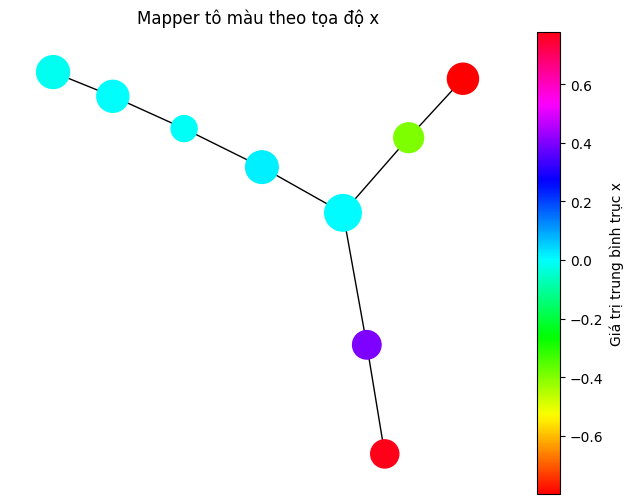

In [64]:
mapper = km.KeplerMapper(verbose=0)
lens = mapper.fit_transform(X, projection="x")  # hoặc "y", "l2norm", PCA(n_components=1)
graph = mapper.map(lens, X,
                   cover=km.Cover(n_cubes=5, perc_overlap=0.1),
                   clusterer=DBSCAN(eps=0.5, min_samples=5))


G = nx.Graph()
colors = []
for node_id, indices in graph['nodes'].items():
    G.add_node(node_id, size=len(indices))
    
    # Trung bình x của các điểm trong node
    mean_x = np.mean(X[indices, 0])
    colors.append(mean_x)

for node1 in graph['links']:
    for node2 in graph['links'][node1]:
        if node1 != node2:
            G.add_edge(node1, node2)
pos = nx.spring_layout(G, seed=42)
sizes = [G.nodes[n]['size'] * 10 for n in G.nodes]
cmap = cm.hsv
norm = plt.Normalize(min(colors), max(colors))
node_colors = [cmap(norm(c)) for c in colors]


fig, ax = plt.subplots(figsize=(8, 6)) 
nx.draw(G, pos, with_labels=False, node_size=sizes, node_color=node_colors, edge_color='black', ax=ax)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig.colorbar(sm, ax=ax, label="Giá trị trung bình trục x")  # sửa ở đây
ax.set_title("Mapper tô màu theo tọa độ x")
ax.axis('off')
plt.show()